### Bibliotecas

In [3]:
import pandas as pd
import geopandas as gpd

### Localização dos arquivos

In [2]:
arquivo_cge = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/8_Dados/Alagamentos_CGESP/Alagamentos_SP_2013.csv'

arquivo_incidentes = '/Users/marcelofernandes/Library/CloudStorage/GoogleDrive-marcelo.fernandes@alumni.usp.br/.shortcut-targets-by-id/1M--OnzbTYagrNv5Ss9fjWlBxCMmasz-Y/10_Mestrado_2021_Marcelo Fernandes/8_Dados/SIRGAS_SHP_riscoocorrencia/SIRGAS_SHP_riscoocorrencia_2013.shp'

### Carregamento e validações dos incidentes do Geosampa

In [ ]:
gdf_incidentes = gpd.read_file(arquivo_incidentes)

In [36]:
print(gdf_incidentes['ocorrencia'].unique())

['QUEDA DE ARVORE' 'ALAGAMENTO' 'INUNDACAO' 'DESLIZAMENTO']
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             2614 non-null   datetime64[ms]
 1   ocorrencia       2614 non-null   object        
 2   subprefeit       2614 non-null   object        
 3   name             2614 non-null   object        
 4   geometry         2614 non-null   geometry      
 5   Correspondencia  2614 non-null   bool          
dtypes: bool(1), datetime64[ms](1), geometry(1), object(3)
memory usage: 104.8+ KB


In [38]:
# Lista de valores que você deseja excluir
valores_excluir = ['QUEDA DE ARVORE', 'DESLIZAMENTO']

# Excluir os valores indesejados diretamente no próprio gdf
gdf_incidentes = gdf_incidentes[~gdf_incidentes['ocorrencia'].isin(valores_excluir)]

# Verifique o resultado
print(gdf_incidentes)

           data  ocorrencia               subprefeit   name  \
2    2013-12-10  ALAGAMENTO         SA - SANTO AMARO  45361   
15   2013-12-25  ALAGAMENTO                  SE - SE  46709   
17   2013-12-26   INUNDACAO  EM - ERMELINO MATARAZZO  46740   
18   2013-12-26   INUNDACAO  EM - ERMELINO MATARAZZO  46737   
19   2013-12-26   INUNDACAO  EM - ERMELINO MATARAZZO  46738   
...         ...         ...                      ...    ...   
2594 2013-10-15  ALAGAMENTO                  SE - SE  39375   
2597 2013-10-15  ALAGAMENTO  AF - ARICANDUVA/FORMOSA  39388   
2603 2013-11-06  ALAGAMENTO         SA - SANTO AMARO  41926   
2610 2013-12-25  ALAGAMENTO                LA - LAPA  46724   
2611 2013-12-25  ALAGAMENTO                LA - LAPA  46705   

                                geometry  Correspondencia  
2      POINT Z (325784.879 7383070.03 0)             True  
15    POINT Z (332700.975 7394728.537 0)             True  
17    POINT Z (349044.816 7401930.694 0)            False  
18 

In [44]:
gdf_incidentes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 759 entries, 2 to 2611
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             759 non-null    datetime64[ms]
 1   ocorrencia       759 non-null    object        
 2   subprefeit       759 non-null    object        
 3   name             759 non-null    object        
 4   geometry         759 non-null    geometry      
 5   Correspondencia  759 non-null    bool          
dtypes: bool(1), datetime64[ms](1), geometry(1), object(3)
memory usage: 36.3+ KB


### Carregamento e validações dos dados de alagamento do CGE-SP

In [23]:
df_cge = pd.read_csv(arquivo_cge, sep=';')
formato_data = '%d/%m/%y'
df_cge['Data']= pd.to_datetime(df_cge['Data'], format=formato_data)

In [39]:
df_cge.head()

,Unnamed: 0,Data,Alagamento,Bairro,Tipo,Horário Inicial,Horário Final,Endereço,Sentido,Referência
0,0,2013-01-08,1,Sé,Inativo Transitável,19:16,22:36,VEL PRES ARTHUR DA COSTA E SILVA,AMBOS,AV GAL OLIMPIO DA SILVEIRA
1,1,2013-01-08,1,Sé,Inativo Transitável,19:19,21:01,VEL PRES ARTHUR DA COSTA E SILVA,AMBOS,AL GLETE
2,2,2013-01-08,1,Sé,Inativo Transitável,19:27,20:29,PÇ. DA BANDEIRA,C/B,RUA SANTO AMARO
3,3,2013-01-08,1,Sé,Inativo Transitável,19:32,22:36,VEL PRES ARTHUR DA COSTA E SILVA,LA/PE,ALTURA DO N. 2001
4,4,2013-01-08,1,Sé,Inativo Transitável,20:01,22:28,AV NOVE DE JULHO,B/C,VD DR EUSEBIO STEVAUX


In [25]:
df_cge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       752 non-null    int64         
 1   Data             752 non-null    datetime64[ns]
 2   Alagamento       752 non-null    int64         
 3   Bairro           752 non-null    object        
 4   Tipo             752 non-null    object        
 5   Horário Inicial  752 non-null    object        
 6   Horário Final    744 non-null    object        
 7   Endereço         752 non-null    object        
 8   Sentido          752 non-null    object        
 9   Referência       752 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 58.9+ KB


### Validações cruzadas entre GeoSampa e CGE-SP

In [40]:
datas_geosampa = gdf_incidentes['data']
datas_cge = df_cge['Data']

In [41]:
# Verificamos se todas as datas do gdf têm correspondência no df
gdf_incidentes['Correspondencia'] = gdf_incidentes['data'].isin(datas_cge)

# Exibe as linhas do gdf que NÃO têm correspondência no df
gdf_sem_correspondencia = gdf_incidentes[gdf_incidentes['Correspondencia'] == False]

# Exibe os resultados
print(gdf_sem_correspondencia)

           data  ocorrencia                subprefeit   name  \
17   2013-12-26   INUNDACAO   EM - ERMELINO MATARAZZO  46740   
18   2013-12-26   INUNDACAO   EM - ERMELINO MATARAZZO  46737   
19   2013-12-26   INUNDACAO   EM - ERMELINO MATARAZZO  46738   
243  2013-11-07  ALAGAMENTO                   SE - SE  41966   
373  2013-10-17  ALAGAMENTO             IP - IPIRANGA  39696   
376  2013-10-17  ALAGAMENTO                   SE - SE  39748   
549  2013-08-06  ALAGAMENTO    CS - CAPELA DO SOCORRO  33295   
732  2013-06-03  ALAGAMENTO    CS - CAPELA DO SOCORRO  27964   
813  2013-04-15   INUNDACAO    CS - CAPELA DO SOCORRO  24449   
838  2013-04-16   INUNDACAO    CS - CAPELA DO SOCORRO  24600   
914  2013-02-05  ALAGAMENTO          SA - SANTO AMARO  16196   
1317 2013-02-17   INUNDACAO                PR - PERUS  17642   
1325 2013-02-17   INUNDACAO     PJ - PIRITUBA/JARAGUA  17633   
1812 2013-01-24  ALAGAMENTO                   SE - SE  15073   
1815 2013-01-23  ALAGAMENTO      JT - JA

In [46]:
gdf_sem_correspondencia['data'].unique()

<DatetimeArray>
['2013-12-26 00:00:00', '2013-11-07 00:00:00', '2013-10-17 00:00:00',
 '2013-08-06 00:00:00', '2013-06-03 00:00:00', '2013-04-15 00:00:00',
 '2013-04-16 00:00:00', '2013-02-05 00:00:00', '2013-02-17 00:00:00',
 '2013-01-24 00:00:00', '2013-01-23 00:00:00', '2013-01-17 00:00:00',
 '2013-01-11 00:00:00', '2013-01-01 00:00:00', '2013-01-07 00:00:00',
 '2013-03-15 00:00:00', '2013-03-14 00:00:00', '2013-03-18 00:00:00',
 '2013-03-11 00:00:00']
Length: 19, dtype: datetime64[ms]

In [49]:
# Adiciona a coluna 'Dia da Semana' ao gdf_sem_correspondencia usando .loc
gdf_sem_correspondencia.loc[:, 'Dia da Semana'] = gdf_sem_correspondencia['data'].dt.day_name()

# Exibe os resultados
print(gdf_sem_correspondencia[['data', 'Dia da Semana']])

           data Dia da Semana
17   2013-12-26      Thursday
18   2013-12-26      Thursday
19   2013-12-26      Thursday
243  2013-11-07      Thursday
373  2013-10-17      Thursday
376  2013-10-17      Thursday
549  2013-08-06       Tuesday
732  2013-06-03        Monday
813  2013-04-15        Monday
838  2013-04-16       Tuesday
914  2013-02-05       Tuesday
1317 2013-02-17        Sunday
1325 2013-02-17        Sunday
1812 2013-01-24      Thursday
1815 2013-01-23     Wednesday
1851 2013-01-17      Thursday
1906 2013-01-11        Friday
1941 2013-01-01       Tuesday
1978 2013-01-07        Monday
2092 2013-01-11        Friday
2093 2013-01-11        Friday
2094 2013-01-11        Friday
2095 2013-01-11        Friday
2097 2013-01-11        Friday
2171 2013-03-15        Friday
2375 2013-03-14      Thursday
2491 2013-03-18        Monday
2509 2013-03-11        Monday
2527 2013-03-11        Monday


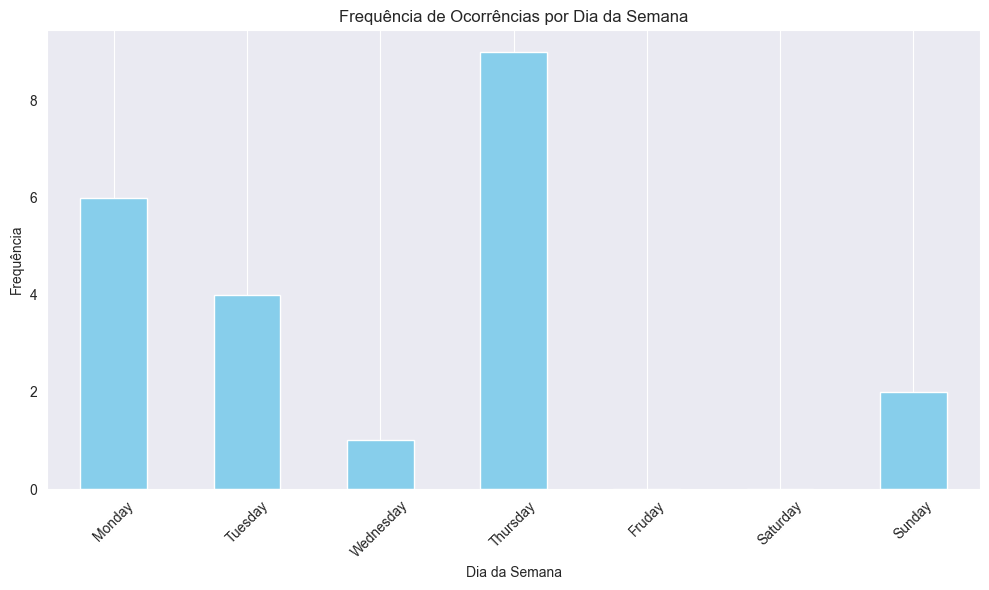

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar a frequência de cada dia da semana
frequencia_dias = gdf_sem_correspondencia['Dia da Semana'].value_counts()

# Reordenar o índice para que os dias da semana apareçam na ordem correta
dias_da_semana = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Fruday', 'Saturday', 'Sunday']
frequencia_dias = frequencia_dias.reindex(dias_da_semana, fill_value=0)

# Gerar o histograma
plt.figure(figsize=(10, 6))
frequencia_dias.plot(kind='bar', color='skyblue')
plt.title('Frequência de Ocorrências por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Exibir o gráfico
plt.tight_layout()  # Ajustar layout
plt.show()

In [42]:
total_true = gdf_sem_correspondencia['Correspondencia'].sum()

# Contar o total de valores False
total_false = len(gdf_sem_correspondencia) - total_true

# Exibir os resultados
print(f"Total True: {total_true}")
print(f"Total False: {total_false}")

Total True: 0
Total False: 29


In [45]:
data_filtro='2013-11-07'

# Converta a string da data para o formato datetime (caso ainda não esteja nesse formato)
data_filtro = pd.to_datetime(data_filtro)

# Filtrar o GeoDataFrame para a data específica
gdf_filtrado = gdf_incidentes[gdf_incidentes['data'] == data_filtro]

# Exibir o resultado
print(gdf_filtrado)

          data  ocorrencia subprefeit   name  \
243 2013-11-07  ALAGAMENTO    SE - SE  41966   

                               geometry  Correspondencia  
243  POINT Z (331807.453 7395518.097 0)            False  


In [57]:
gdf_incidentes['data'].unique()

<DatetimeArray>
['2013-12-10 00:00:00', '2013-12-25 00:00:00', '2013-12-26 00:00:00',
 '2013-12-05 00:00:00', '2013-12-29 00:00:00', '2013-11-21 00:00:00',
 '2013-11-17 00:00:00', '2013-11-04 00:00:00', '2013-11-07 00:00:00',
 '2013-11-16 00:00:00', '2013-11-23 00:00:00', '2013-11-25 00:00:00',
 '2013-11-26 00:00:00', '2013-10-18 00:00:00', '2013-10-02 00:00:00',
 '2013-10-23 00:00:00', '2013-10-04 00:00:00', '2013-10-15 00:00:00',
 '2013-10-16 00:00:00', '2013-10-24 00:00:00', '2013-10-25 00:00:00',
 '2013-10-17 00:00:00', '2013-09-23 00:00:00', '2013-09-30 00:00:00',
 '2013-09-22 00:00:00', '2013-09-19 00:00:00', '2013-09-24 00:00:00',
 '2013-08-06 00:00:00', '2013-07-23 00:00:00', '2013-07-01 00:00:00',
 '2013-06-26 00:00:00', '2013-06-02 00:00:00', '2013-06-30 00:00:00',
 '2013-06-24 00:00:00', '2013-06-03 00:00:00', '2013-06-11 00:00:00',
 '2013-04-05 00:00:00', '2013-04-15 00:00:00', '2013-04-03 00:00:00',
 '2013-04-13 00:00:00', '2013-04-16 00:00:00', '2013-04-12 00:00:00',
 '20

### Preparação dos pacotes de simulação